# Preprocessing Spaceship Titanic dataset

##### In this notebook, we preprocess both the training and test datasets 
##### so that the test set has the same features as the training set used for model training.
##### We will use the test set for predictions and submission to Kaggle.

In [1272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

import gender

In [1273]:
test_set = pd.read_csv('../source_data/test.csv')
test_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [1274]:
# Checking missing values and their percentage in the dataset
# mv - missing values
test = pd.DataFrame({
    'Feature': test_set.columns,
    'Missing Values': test_set.isna().sum().values,
})
test['Ratio'] = round((test['Missing Values'] / len(test_set)) * 100, 2)
test

,Feature,Missing Values,Ratio
0,PassengerId,0,0.00
1,HomePlanet,87,2.03
2,CryoSleep,93,2.17
3,Cabin,100,2.34
4,Destination,92,2.15
5,Age,91,2.13
6,VIP,93,2.17
7,RoomService,82,1.92
8,FoodCourt,106,2.48
9,ShoppingMall,98,2.29


In [1275]:
data = pd.read_csv('../source_data/train.csv')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [1276]:
# Converting target column from boolean to int
data['Transported'] = data['Transported'].astype(int)
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [1277]:
# Checking missing values and their percentage in the dataset
# mv - missing values
mv_data = pd.DataFrame({
    'Feature': data.columns,
    'Missing Values': data.isna().sum().values,
})
mv_data['Ratio'] = round((mv_data['Missing Values'] / len(data)) * 100, 2)
mv_data

,Feature,Missing Values,Ratio
0,PassengerId,0,0.00
1,HomePlanet,201,2.31
2,CryoSleep,217,2.50
3,Cabin,199,2.29
4,Destination,182,2.09
5,Age,179,2.06
6,VIP,203,2.34
7,RoomService,181,2.08
8,FoodCourt,183,2.11
9,ShoppingMall,208,2.39


In [1278]:
mv_data_test_set = pd.DataFrame({
    'Feature': test_set.columns,
    'Missing Values': test_set.isna().sum().values,
})
mv_data_test_set['Ratio'] = round((mv_data_test_set['Missing Values'] / len(data)) * 100, 2)
mv_data_test_set

,Feature,Missing Values,Ratio
0,PassengerId,0,0.00
1,HomePlanet,87,1.00
2,CryoSleep,93,1.07
3,Cabin,100,1.15
4,Destination,92,1.06
5,Age,91,1.05
6,VIP,93,1.07
7,RoomService,82,0.94
8,FoodCourt,106,1.22
9,ShoppingMall,98,1.13


#### Step 1 - Filling the missing values in the `HomePlanet` feature
##### Criterion: if the passengers are in the same cabin and at least one of them has a `HomePlanet` value

---



In [1279]:
training_set = data
training_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [1280]:
# Distribution of the passenger by HomePlanet
home_planet = training_set['HomePlanet'].value_counts(dropna=False).to_frame('count').assign(
    **{'ratio': lambda x: round(x['count'] / x['count'].sum() * 100, 2)}
)
home_planet

,count,ratio
HomePlanet,,
Earth,4602,52.94
Europa,2131,24.51
Mars,1759,20.23
NaN,201,2.31


In [1281]:
# Distribution of the passenger by HomePlanet
home_planet_ts = test_set['HomePlanet'].value_counts(dropna=False).to_frame('count').assign(
    **{'ratio': lambda x: round(x['count'] / x['count'].sum() * 100, 2)}
)
home_planet_ts

,count,ratio
HomePlanet,,
Earth,2263,52.91
Europa,1002,23.43
Mars,925,21.63
NaN,87,2.03


In [1282]:
# Select all duplicated Cabin values
# We want to find all passengers who share the same cabin,
# as they are most likely from the same HomePlanet.
duplicates = training_set[training_set['Cabin'].duplicated(keep=False)]
duplicates

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,1
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,1
11,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,1
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,0
8687,9275_03,Europa,NaN,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [1283]:
duplicates_ts = test_set[test_set['Cabin'].duplicated(keep=False)]
duplicates_ts

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
11,0040_01,Europa,False,D/2/P,TRAPPIST-1e,45.0,False,932.0,74.0,NaN,7.0,1010.0,Antino Pinoffent
12,0040_02,Europa,False,D/2/P,TRAPPIST-1e,44.0,False,0.0,1561.0,0.0,14.0,224.0,Jihda Pinoffent
15,0046_02,Earth,False,F/11/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,903.0,NaN,Glene Powery
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4256,9238_03,Earth,True,G/1501/P,TRAPPIST-1e,16.0,False,0.0,0.0,0.0,0.0,0.0,Herina Emenez
4257,9238_04,Earth,False,G/1501/P,TRAPPIST-1e,26.0,False,882.0,2.0,0.0,0.0,0.0,Marlie Emenez
4258,9238_05,Earth,True,NaN,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,0.0,0.0,Caseye Emenez
4259,9238_06,Earth,False,G/1501/P,55 Cancri e,0.0,False,0.0,0.0,0.0,0.0,0.0,Blance Garnettiz


In [1284]:
# Check all NaN HomePlanet values
# We want to see all passengers missing a HomePlanet value
duplicates[duplicates['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,0
438,0470_02,NaN,True,F/86/S,TRAPPIST-1e,36.0,False,0.0,0.0,0.0,0.0,0.0,Jurs Binie,1
471,0504_06,NaN,True,B/19/S,55 Cancri e,53.0,False,0.0,0.0,0.0,0.0,0.0,Alheneb Unpasine,1
501,0539_03,NaN,True,C/18/P,55 Cancri e,30.0,False,0.0,0.0,0.0,0.0,0.0,Alderak Nalanet,1
505,0540_02,NaN,False,F/95/S,TRAPPIST-1e,17.0,False,1471.0,0.0,0.0,45.0,16.0,Rantax Conie,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,8816_02,NaN,True,B/340/S,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Mesatik Diouselt,1
8295,8860_02,NaN,True,F/1825/P,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,Guls Vloaf,1
8353,8938_01,NaN,True,F/1729/S,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Quites Must,1
8489,9072_01,NaN,True,F/1758/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Gork Creke,1


In [1285]:
duplicates_ts[duplicates_ts['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
535,1124_02,NaN,True,C/44/S,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Keidhma Dighty
573,1184_02,NaN,False,C/46/S,55 Cancri e,55.0,False,0.0,156.0,0.0,NaN,361.0,Dyonif Peraket
712,1471_02,NaN,True,G/226/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Weney Morez
737,1502_01,NaN,False,C/54/P,55 Cancri e,25.0,False,0.0,170.0,1.0,601.0,7470.0,Acraban Foraud
763,1553_02,NaN,False,F/302/S,TRAPPIST-1e,36.0,False,1093.0,0.0,1566.0,0.0,0.0,Golos Hacle
899,1862_02,NaN,False,G/304/P,55 Cancri e,35.0,False,557.0,0.0,0.0,393.0,0.0,Joanry Bardsey
991,2057_01,NaN,True,G/332/P,PSO J318.5-22,6.0,False,0.0,NaN,0.0,0.0,0.0,Carold Carley
1063,2245_01,NaN,True,A/17/P,55 Cancri e,43.0,False,0.0,0.0,0.0,0.0,0.0,Propent Hyling
1105,2344_01,NaN,False,B/70/P,55 Cancri e,52.0,False,0.0,142.0,0.0,378.0,3209.0,Bellus Belstrut
1160,2430_03,NaN,False,G/394/S,NaN,19.0,False,785.0,0.0,0.0,0.0,0.0,Ronia Mcphernard


In [1286]:
# Add HomePlanet for passengers who share the same cabin
import importlib
import functions.add_home_planet
importlib.reload(functions.add_home_planet)
from functions.add_home_planet import add_home_planet, add_home_planet_test_set

In [1287]:
pipeline_train = Pipeline([
    ('HomePlanet', FunctionTransformer(add_home_planet))
])

pipeline_test = Pipeline([
    ('HomePlanetTestSet', FunctionTransformer(add_home_planet_test_set))
])

training_set = pipeline_train.fit_transform(training_set)
test_set = pipeline_test.fit_transform(test_set)

In [1288]:
# Checking missing values after adding HomePlanet for records where it is logically applicable
training_set['HomePlanet'].isna().sum()

np.int64(148)

In [1289]:
# Test set HomePlanet ratio
test_set['HomePlanet'].value_counts()

HomePlanet
Earth     2264
Europa    1005
Mars       926
Name: count, dtype: int64

In [1290]:
# Filling the Nan values in the HomePlanet feature in Test set
planet_ratios_ts = {
    'Earth': 2264,
    'Europa': 1005,
    'Mars': 926
}

planets = list(planet_ratios_ts.keys())
weights = np.array(list(planet_ratios_ts.values()))
weights = weights / weights.sum()

missing_mask = test_set['HomePlanet'].isna()

test_set.loc[missing_mask, 'HomePlanet'] = np.random.choice(
    planets,
    size=missing_mask.sum(),
    p=weights
)
test_set['HomePlanet'].isna().sum()

np.int64(0)

In [1291]:
planet_ratios = {
    'Earth': 52.94,
    'Europa': 24.51,
    'Mars': 20.23
}

In [1292]:
# Finding the rows with missing values
mask = training_set['HomePlanet'].isna()
n_missing = mask.sum()

In [1293]:
# Calculate how many rows for every planet we need to fill
counts_to_fill = (
    (pd.Series(planet_ratios) / 100 * n_missing)
    .round()
    .astype(int)
)
counts_to_fill

Earth     78
Europa    36
Mars      30
dtype: int64

In [1294]:
# Generate list with the planets depends on distribution
fill_values = np.concatenate([
    [planet] * count for planet, count in counts_to_fill.items()
])

In [1295]:
# if due to rounding there are missing or extra values — adjust accordingly
diff = n_missing - len(fill_values)
if diff > 0:
    fill_values = np.append(fill_values, np.random.choice(list(planet_ratios.keys()), diff))
elif diff < 0:
    fill_values = fill_values[:diff]

In [1296]:
np.random.shuffle(fill_values)

In [1297]:
training_set.loc[mask, 'HomePlanet'] = fill_values

In [1298]:
training_set['HomePlanet'].isna().sum()

np.int64(0)

### Handling Duplicate Cabins and Missing `HomePlanet` Values

In this step, we extracted all cabins that have duplicates.  
Then, from this list, we filtered out all records where the `HomePlanet` value is missing.  
After that, we manually checked each passenger ID.  
If two or more passengers share the same cabin and one of them has a missing `HomePlanet` value,  
we assigned the same value from the other passenger(s) in that cabin.  

This is a more reliable approach for filling the missing values.

#### Step 2 - Filling the missing values in the `CryoSleep` feature
##### Criterion: According to the percentage distribution of non-missing values grouped by HomePlanet

---



In [1299]:
training_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [1300]:
test_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


#### We will explore the data and look for an approach to fill the missing values

In [1301]:
# We split the dataset into two parts – the first part contains data with no missing values for CryoSleep, 
# and the second part contains data with missing values for CryoSleep.
not_missing_cryo = training_set[training_set['CryoSleep'].notna()]
missing_cryo_sleep = training_set[training_set['CryoSleep'].isna()]

not_missing_cryo_test_set = test_set[test_set['CryoSleep'].notna()]
missing_cryo_sleep_test_set = test_set[test_set['CryoSleep'].isna()]

In [1302]:
not_missing_cryo

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [1303]:
not_missing_cryo_test_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [1304]:
# Displaying the ratio and distribution of not missing CryoSleep values
not_missing_cryo['HomePlanet'].value_counts().to_frame('count').assign(
    **{'ratio': lambda x: round(x['count'] / x['count'].sum() * 100, 2)}
)

,count,ratio
HomePlanet,,
Earth,4581,54.05
Europa,2132,25.15
Mars,1763,20.80


In [1305]:
not_missing_cryo_test_set['HomePlanet'].value_counts().to_frame('count').assign(
    **{'ratio': lambda x: round(x['count'] / x['count'].sum() * 100, 2)}
)

,count,ratio
HomePlanet,,
Earth,2262,54.06
Europa,1000,23.90
Mars,922,22.04


In [1306]:
# The distribution of passengers who are in CryoSleep and those who are not, grouped by HomePlanet. 
# The goal is to maintain this ratio in order to fill in the missing values for the CryoSleep feature.
cryo_sleep_passengers_group_by_planet = (
    not_missing_cryo
    .groupby(['HomePlanet', 'CryoSleep'])
    .size()
    .to_frame('count')
    .assign(
        ratio=lambda x: round(x['count'] / x.groupby(level=0)['count'].transform('sum') * 100, 2)
    )
)

cryo_sleep_passengers_group_by_planet

count  ratio
HomePlanet CryoSleep              
Earth      False       3166  69.11
           True        1415  30.89
Europa     False       1199  56.24
           True         933  43.76
Mars       False       1074  60.92
           True         689  39.08

In [1307]:
cryo_sleep_passengers_group_by_planet_test_set = (
    not_missing_cryo_test_set
    .groupby(['HomePlanet', 'CryoSleep'])
    .size()
    .to_frame('count')
    .assign(
        ratio=lambda x: round(x['count'] / x.groupby(level=0)['count'].transform('sum') * 100, 2)
    )
)

cryo_sleep_passengers_group_by_planet_test_set

count  ratio
HomePlanet CryoSleep              
Earth      False       1556  68.79
           True         706  31.21
Europa     False        531  53.10
           True         469  46.90
Mars       False        553  59.98
           True         369  40.02

In [1308]:
missing_cryo_sleep

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,1
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,0
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious,0
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,1
152,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,9197_01,Europa,NaN,C/308/P,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Bellus Platch,1
8651,9227_05,Earth,NaN,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,Hard Hinglendez,0
8664,9246_01,Earth,NaN,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,NaN,1
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,1


In [1309]:
missing_cryo_sleep_test_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
68,0156_01,Mars,NaN,F/34/P,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Tures Upead
78,0175_02,Earth,NaN,G/25/P,55 Cancri e,8.0,False,0.0,0.0,0.0,0.0,0.0,Elody Benney
92,0208_01,Earth,NaN,G/33/P,TRAPPIST-1e,40.0,False,44.0,0.0,565.0,0.0,18.0,Mael Vales
99,0227_01,Earth,NaN,NaN,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Buckentry
165,0349_01,Europa,NaN,A/4/S,TRAPPIST-1e,33.0,False,0.0,1030.0,0.0,3490.0,5832.0,Meropus Ametic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,8705_01,Mars,NaN,F/1790/P,55 Cancri e,20.0,False,0.0,0.0,0.0,0.0,0.0,Anch Gen
4108,8925_06,Europa,NaN,C/295/P,TRAPPIST-1e,27.0,False,0.0,2182.0,7.0,2582.0,19.0,Zedarga Pabler
4209,9138_01,Europa,NaN,NaN,TRAPPIST-1e,41.0,False,0.0,1998.0,0.0,1023.0,867.0,Misamak Trupistic
4230,9182_01,Earth,NaN,F/1776/S,TRAPPIST-1e,14.0,False,0.0,0.0,NaN,1377.0,29.0,Garyan Gainebergan


In [1310]:
# Displaying the ratio and distribution of missing CryoSleep values grouped by Home Planet
missing_cryo_sleep['HomePlanet'].value_counts().to_frame('count').assign(
    **{'ratio': lambda x: round(x['count'] / x['count'].sum() * 100, 2)}
)

,count,ratio
HomePlanet,,
Earth,115,53.00
Europa,58,26.73
Mars,44,20.28


In [1311]:
missing_cryo_sleep_test_set['HomePlanet'].value_counts().to_frame('count').assign(
    **{'ratio': lambda x: round(x['count'] / x['count'].sum() * 100, 2)}
)

,count,ratio
HomePlanet,,
Earth,51,54.84
Europa,23,24.73
Mars,19,20.43


In [1312]:
ratio_dict = (
    cryo_sleep_passengers_group_by_planet
    .reset_index()
    .pivot(index='HomePlanet', columns='CryoSleep', values='ratio')
    .fillna(0)
)
ratio_dict

CryoSleep,False,True
HomePlanet,,
Earth,69.11,30.89
Europa,56.24,43.76
Mars,60.92,39.08


In [1313]:
def fill_cryo(row):
    if pd.isna(row['CryoSleep']):
        probs = ratio_dict.loc[row['HomePlanet']] / 100
        return np.random.choice([False, True], p=[probs[False], probs[True]])
    return row['CryoSleep']

training_set['CryoSleep'] = training_set.apply(fill_cryo, axis=1)
test_set['CryoSleep'] = test_set.apply(fill_cryo, axis=1)

In [1314]:
# Checking for missing values
training_set['CryoSleep'].isna().sum()

np.int64(0)

In [1315]:
test_set['CryoSleep'].isna().sum()

np.int64(0)

In [1316]:
# Converting CryoSleep values from boolean to int
training_set['CryoSleep'] = training_set['CryoSleep'].astype(int)
test_set['CryoSleep'] = test_set['CryoSleep'].astype(int)

In [1317]:
training_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [1318]:
test_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,0,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,1,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,0,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


#### Step 2 - Filling the missing values in the `Cabine` feature
##### cabin code `deck/num/side`


---

In [1319]:
training_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [1320]:
test_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,0,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,1,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,0,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


#### Filling cabin_deck

---

In [1321]:
def split_cabin_feature(ds):
    ds['cabin_deck'] = ds['Cabin'].str.split('/').str[0]
    ds['cabin_num'] = ds['Cabin'].str.split('/').str[1]
    ds['cabin_side'] = ds['Cabin'].str.split('/').str[2]
    ds = ds.drop(columns='Cabin')
    
    return ds

training_set = split_cabin_feature(training_set)
test_set = split_cabin_feature(test_set)

In [1322]:
training_set['cabin_deck'].isna().sum()

np.int64(199)

In [1323]:
test_set['cabin_deck'].isna().sum()

np.int64(100)

In [1324]:
def cabin_deck_ratios(planet):
    """
    :param planet: Name of the selected planet
    :return: Dictionary where keys are deck names and 
    values are their percentage ratios for the given planet
    """
    home_planet_cabin = training_set[training_set['HomePlanet'] == planet]
    
    result = home_planet_cabin['cabin_deck'].value_counts(dropna=False).pipe(
    lambda x: x.to_frame('count').assign(ratio=round(x / x.sum() * 100, 2))
    )
    
    return result['ratio'].to_dict()

In [1325]:
list_deck_ratios_by_planets = []
for p in ['Earth', 'Europa', 'Mars']:
    list_deck_ratios_by_planets.append(cabin_deck_ratios(p))

In [1326]:
list_deck_ratios_by_planets_ts = []
for p in ['Earth', 'Europa', 'Mars']:
    list_deck_ratios_by_planets_ts.append(cabin_deck_ratios(p))

In [1327]:
def fill_cabin_deck(dataset, planet, ratios):
    """
    :param dataset: DataFrame (training_set or test_set)
    :param planet: Name of the planet
    :param ratios: Dictionary with deck ratios for the given planet
    """
    mask_planet = dataset['HomePlanet'] == planet
    mask_missing = dataset['cabin_deck'].isna() & mask_planet

    choices = list(ratios.keys())
    weights = np.array(list(ratios.values()))
    weights = weights / weights.sum()

    dataset.loc[mask_missing, 'cabin_deck'] = np.random.choice(
        choices,
        size=mask_missing.sum(),
        p=weights
    )

In [1328]:
rts = {
    'Earth': list_deck_ratios_by_planets[0],
    'Europa': list_deck_ratios_by_planets[1],
    'Mars': list_deck_ratios_by_planets[2]
}

In [1329]:
rts_ts = {
    'Earth': list_deck_ratios_by_planets_ts[0],
    'Europa': list_deck_ratios_by_planets_ts[1],
    'Mars': list_deck_ratios_by_planets_ts[2]
}

In [1330]:
for k, v in rts.items():
    fill_cabin_deck(training_set, k, v)

In [1331]:
for k, v in rts_ts.items():
    fill_cabin_deck(test_set, k, v)

In [1332]:
# Check for missing (NaN) values in the 'cabin_deck' feature
training_set['cabin_deck'].isna().sum()

np.int64(0)

In [1333]:
test_set['cabin_deck'].isna().sum()

np.int64(0)

In [1334]:
training_set

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,98,P
8689,9278_01,Earth,1,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,1499,S
8690,9279_01,Earth,0,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,1500,S
8691,9280_01,Europa,0,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,608,S


In [1335]:
training_set['cabin_num'] = pd.to_numeric(training_set['cabin_num'], errors='coerce')

In [1336]:
test_set

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,cabin_deck,cabin_num,cabin_side
0,0013_01,Earth,1,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,0,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,1,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,0,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,0,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S
4273,9269_01,Earth,0,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,G,NaN,NaN
4274,9271_01,Mars,1,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P
4275,9273_01,Europa,0,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P


In [1337]:
test_set['cabin_num'] = pd.to_numeric(test_set['cabin_num'], errors='coerce')

In [1338]:
training_set.replace({'cabin_deck': 'nan'}, np.nan, inplace=True)
test_set.replace({'cabin_deck': 'nan'}, np.nan, inplace=True)

training_set['cabin_deck'] = training_set['cabin_deck'].fillna('G')
test_set['cabin_deck'] = test_set['cabin_deck'].fillna('G')

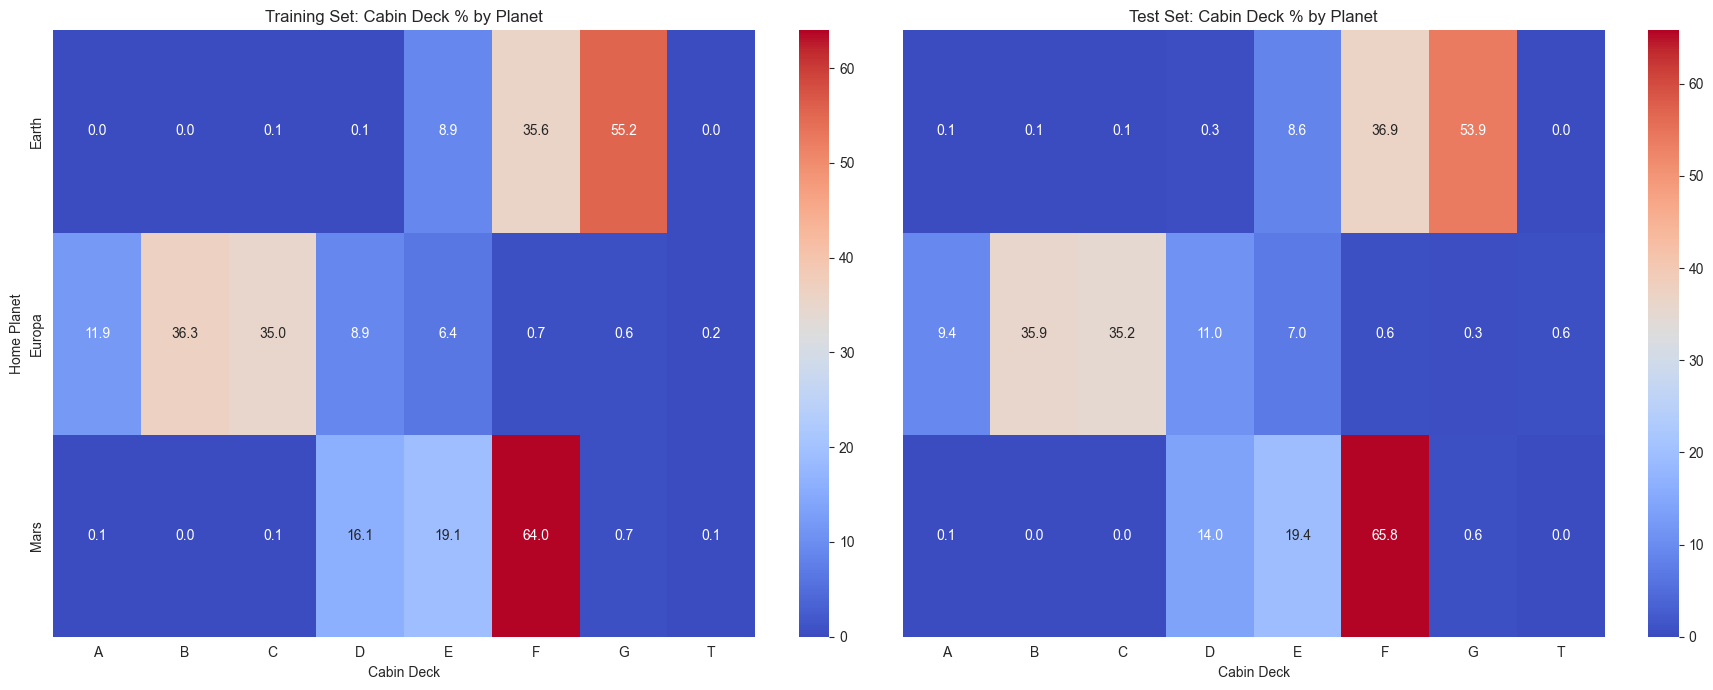

In [1339]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# --- Training set ---
deck_distribution = (
    training_set.groupby(['HomePlanet', 'cabin_deck'])
    .size()
    .unstack(fill_value=0)
)
deck_distribution = deck_distribution.div(deck_distribution.sum(axis=1), axis=0) * 100

sns.heatmap(deck_distribution, annot=True, fmt=".1f", cmap='coolwarm', ax=axes[0])
axes[0].set_title('Training Set: Cabin Deck % by Planet')
axes[0].set_xlabel('Cabin Deck')
axes[0].set_ylabel('Home Planet')

# --- Test set ---
deck_distribution_ts = (
    test_set.groupby(['HomePlanet', 'cabin_deck'])
    .size()
    .unstack(fill_value=0)
)
deck_distribution_ts = deck_distribution_ts.div(deck_distribution_ts.sum(axis=1), axis=0) * 100

sns.heatmap(deck_distribution_ts, annot=True, fmt=".1f", cmap='coolwarm', ax=axes[1])
axes[1].set_title('Test Set: Cabin Deck % by Planet')
axes[1].set_xlabel('Cabin Deck')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

##### These two matrices show the percentage distribution of Decks for each planet.
##### For example, on planet Earth, 55.3% of passengers from this planet are accommodated on Deck G.
##### Here, we can clearly distinguish the inhabitants of the three planets and their distribution across the spaceship.
##### A more detailed analysis of all features will be conducted in the EDA section.

#### Filling cabin_num

---

In [1340]:
# Cabin num / Nan values count / Nan values ratio
nan_values_cabin_num = pd.DataFrame({
    'training_set': [training_set['cabin_num'].isna().sum(), 
                     round(training_set['cabin_num'].isna().sum() / len(training_set) * 100, 2)],
    'test_set': [test_set['cabin_num'].isna().sum(), 
                 round(test_set['cabin_num'].isna().sum() / len(test_set) * 100, 2)]
}, index=['Nan values abs', 'Nan Ratio'])

nan_values_cabin_num

,training_set,test_set
Nan values abs,199.00,100.00
Nan Ratio,2.29,2.34


We see an approximately equal ratio of NaN values compared to the other features.
It is possible that the dataset was intentionally designed this way, and the best results will be achieved if the missing values are filled in correctly.
At the moment, the best result we have achieved is a model accuracy of 0.8122 according to the Kaggle evaluation, which corresponds to position 33 out of 1877 at the time of submission.

1. Determining the value of cabin_num is a complex task filled with many uncertainties.
It is possible for a cabin_num to appear multiple times, simply with a different cabin_deck value.
It is also possible that the last and highest cabin_num value is not actually the final one, and that the numbering continues beyond 1894.
The third option is that both probabilities I chose are valid.

2. I’ve noticed some inconsistencies in the data. For example, there is a resident from Mars assigned to cabin_deck G, even though, according to the distribution matrix of residents by cabin_deck, only 0.4% of Martian residents are located there. This is likely just an inaccuracy resulting from the artificially generated nature of the dataset.

3. We will test and increase the numbering of cabin_num. At this stage, we have filled the missing numbers with one passenger each. We will see the results once the model makes its prediction and we check the outcome on Kaggle. If the prediction has not improved, we will test other options.

#### Filling cabin_num - Training Set


---

In [1341]:
training_set.sort_values('cabin_num')

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0.0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0.0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0.0,S
5,0005_01,Earth,0,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,1,F,0.0,P
7,0006_02,Earth,1,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,1,G,0.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,0,55 Cancri e,53.0,False,0.0,1127.0,0.0,3939.0,NaN,Naosura Motled,0,C,NaN,NaN
8475,9057_01,Europa,0,55 Cancri e,36.0,True,132.0,3479.0,0.0,3786.0,0.0,Coxan Statch,0,B,NaN,NaN
8485,9069_03,Europa,1,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Bath Brakeng,1,C,NaN,NaN
8509,9081_03,Earth,1,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Beula Clemondsey,0,G,NaN,NaN


In [1342]:
check = training_set[['PassengerId', 'cabin_deck', 'cabin_num', 'cabin_side']].sort_values('cabin_num')
check

,PassengerId,cabin_deck,cabin_num,cabin_side
0,0001_01,B,0.0,P
1,0002_01,F,0.0,S
2,0003_01,A,0.0,S
5,0005_01,F,0.0,P
7,0006_02,G,0.0,S
...,...,...,...,...
8209,8772_02,C,NaN,NaN
8475,9057_01,B,NaN,NaN
8485,9069_03,C,NaN,NaN
8509,9081_03,G,NaN,NaN


In [1343]:
check[check['cabin_num'].isna()]

,PassengerId,cabin_deck,cabin_num,cabin_side
15,0012_01,G,NaN,NaN
93,0101_01,F,NaN,NaN
103,0110_01,B,NaN,NaN
222,0239_01,F,NaN,NaN
227,0244_01,G,NaN,NaN
...,...,...,...,...
8209,8772_02,C,NaN,NaN
8475,9057_01,B,NaN,NaN
8485,9069_03,C,NaN,NaN
8509,9081_03,G,NaN,NaN


In [1344]:
missing = list(set(range(0, int(check['cabin_num'].max()) + 1)) - set(check['cabin_num'].dropna().astype(int)))
id_missing_cabin_num = training_set[training_set['cabin_num'].isna()]['PassengerId'].tolist()

In [1345]:
for pid, num in zip(id_missing_cabin_num[:len(missing)], missing):
    training_set.loc[training_set['PassengerId'] == pid, 'cabin_num'] = num

In [1346]:
training_set.sort_values('cabin_num')

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0.0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0.0,S
30,0026_01,Europa,0,55 Cancri e,34.0,False,22.0,6073.0,0.0,1438.0,328.0,Anyoni Unconary,0,C,0.0,P
113,0119_01,Mars,0,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,0,A,0.0,P
7,0006_02,Earth,1,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,1,G,0.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,0,55 Cancri e,53.0,False,0.0,1127.0,0.0,3939.0,NaN,Naosura Motled,0,C,NaN,NaN
8475,9057_01,Europa,0,55 Cancri e,36.0,True,132.0,3479.0,0.0,3786.0,0.0,Coxan Statch,0,B,NaN,NaN
8485,9069_03,Europa,1,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Bath Brakeng,1,C,NaN,NaN
8509,9081_03,Earth,1,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Beula Clemondsey,0,G,NaN,NaN


In [1347]:
start_num = 1895
missing_mask = training_set['cabin_num'].isna()
num_missing = missing_mask.sum()

training_set.loc[missing_mask, 'cabin_num'] = range(start_num, start_num + num_missing)

training_set.sort_values('cabin_num')

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0.0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0.0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0.0,S
5,0005_01,Earth,0,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,1,F,0.0,P
23,0020_03,Earth,1,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,0,E,0.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,0,55 Cancri e,53.0,False,0.0,1127.0,0.0,3939.0,NaN,Naosura Motled,0,C,2011.0,NaN
8475,9057_01,Europa,0,55 Cancri e,36.0,True,132.0,3479.0,0.0,3786.0,0.0,Coxan Statch,0,B,2012.0,NaN
8485,9069_03,Europa,1,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Bath Brakeng,1,C,2013.0,NaN
8509,9081_03,Earth,1,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Beula Clemondsey,0,G,2014.0,NaN


#### Filling cabin_num - Test Set

---

In [1348]:
test_set.sort_values('cabin_num')

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,cabin_deck,cabin_num,cabin_side
2,0019_01,Europa,1,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0.0,S
19,0047_03,Europa,0,TRAPPIST-1e,40.0,False,26.0,1925.0,8.0,3144.0,63.0,NaN,B,0.0,S
7,0032_01,Europa,1,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry,D,0.0,S
13,0042_01,Mars,1,TRAPPIST-1e,46.0,False,0.0,0.0,0.0,0.0,0.0,Hamus Frité,E,0.0,P
8,0032_02,Europa,1,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry,D,0.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209,9138_01,Europa,0,TRAPPIST-1e,41.0,False,0.0,1998.0,0.0,1023.0,867.0,Misamak Trupistic,C,NaN,NaN
4248,9223_01,Mars,1,TRAPPIST-1e,24.0,False,0.0,0.0,NaN,0.0,0.0,Weessh Sun,F,NaN,NaN
4249,9223_02,Mars,1,TRAPPIST-1e,17.0,False,0.0,0.0,0.0,0.0,0.0,Perit Sun,E,NaN,NaN
4258,9238_05,Earth,1,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,0.0,0.0,Caseye Emenez,G,NaN,NaN


In [1349]:
len(test_set[test_set['cabin_num'].isna()])

100

In [1350]:
check_ts = test_set[['PassengerId', 'cabin_deck', 'cabin_num', 'cabin_side']].sort_values('cabin_num')
check_ts

,PassengerId,cabin_deck,cabin_num,cabin_side
2,0019_01,C,0.0,S
19,0047_03,B,0.0,S
7,0032_01,D,0.0,S
13,0042_01,E,0.0,P
8,0032_02,D,0.0,S
...,...,...,...,...
4209,9138_01,C,NaN,NaN
4248,9223_01,F,NaN,NaN
4249,9223_02,E,NaN,NaN
4258,9238_05,G,NaN,NaN


In [1351]:
missing_ts = list(set(range(0, int(check_ts['cabin_num'].max()) + 1)) - set(check_ts['cabin_num'].dropna().astype(int)))
id_missing_cabin_num_ts = test_set[test_set['cabin_num'].isna()]['PassengerId'].tolist()

In [1352]:
len(missing_ts)

386

In [1353]:
len(id_missing_cabin_num_ts)

100

In the test data, things are even stranger. We have 386 missing numbers but only 100 IDs. Here, we will fill the missing cabin numbers sequentially for the available IDs.
This means that at some point, the cabin numbering will no longer be consecutive, unlike in the training data. For example — cabin_num: 1422, 1423...1425, and so on.
So far, I haven’t found any pattern that indicates how the cabins are divided, so for now, we will fill them using this approach.

In [1354]:
for pid, num in zip(id_missing_cabin_num_ts[:len(missing_ts)], missing_ts):
    test_set.loc[test_set['PassengerId'] == pid, 'cabin_num'] = num

test_set.sort_values('cabin_num')

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,cabin_deck,cabin_num,cabin_side
2,0019_01,Europa,1,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0.0,S
8,0032_02,Europa,1,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry,D,0.0,S
244,0524_01,Europa,0,TRAPPIST-1e,35.0,False,0.0,6442.0,672.0,238.0,60.0,Tabius Frogauded,T,0.0,S
19,0047_03,Europa,0,TRAPPIST-1e,40.0,False,26.0,1925.0,8.0,3144.0,63.0,NaN,B,0.0,S
7,0032_01,Europa,1,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry,D,0.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,9210_01,Earth,0,TRAPPIST-1e,19.0,False,547.0,0.0,0.0,0.0,275.0,Anie Belley,F,1882.0,P
4243,9212_01,Earth,0,TRAPPIST-1e,13.0,False,2835.0,4.0,152.0,0.0,334.0,Nelsie Philloway,F,1883.0,P
4247,9216_01,Earth,0,TRAPPIST-1e,22.0,False,0.0,147.0,3.0,0.0,494.0,Luise Barrez,F,1885.0,P
4250,9228_01,Earth,0,TRAPPIST-1e,21.0,NaN,640.0,0.0,21.0,0.0,76.0,Davis Bulliamoses,F,1887.0,P


#### Filling cabin_num - Results

---

In [1355]:
training_set.sort_values('cabin_num')

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0.0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0.0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0.0,S
5,0005_01,Earth,0,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,1,F,0.0,P
23,0020_03,Earth,1,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,0,E,0.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,0,55 Cancri e,53.0,False,0.0,1127.0,0.0,3939.0,NaN,Naosura Motled,0,C,2011.0,NaN
8475,9057_01,Europa,0,55 Cancri e,36.0,True,132.0,3479.0,0.0,3786.0,0.0,Coxan Statch,0,B,2012.0,NaN
8485,9069_03,Europa,1,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Bath Brakeng,1,C,2013.0,NaN
8509,9081_03,Earth,1,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Beula Clemondsey,0,G,2014.0,NaN


In [1356]:
len(training_set[training_set['cabin_num'].isna()])

0

In [1357]:
test_set.sort_values('cabin_num')

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,cabin_deck,cabin_num,cabin_side
2,0019_01,Europa,1,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0.0,S
8,0032_02,Europa,1,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry,D,0.0,S
244,0524_01,Europa,0,TRAPPIST-1e,35.0,False,0.0,6442.0,672.0,238.0,60.0,Tabius Frogauded,T,0.0,S
19,0047_03,Europa,0,TRAPPIST-1e,40.0,False,26.0,1925.0,8.0,3144.0,63.0,NaN,B,0.0,S
7,0032_01,Europa,1,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry,D,0.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,9210_01,Earth,0,TRAPPIST-1e,19.0,False,547.0,0.0,0.0,0.0,275.0,Anie Belley,F,1882.0,P
4243,9212_01,Earth,0,TRAPPIST-1e,13.0,False,2835.0,4.0,152.0,0.0,334.0,Nelsie Philloway,F,1883.0,P
4247,9216_01,Earth,0,TRAPPIST-1e,22.0,False,0.0,147.0,3.0,0.0,494.0,Luise Barrez,F,1885.0,P
4250,9228_01,Earth,0,TRAPPIST-1e,21.0,NaN,640.0,0.0,21.0,0.0,76.0,Davis Bulliamoses,F,1887.0,P


In [1358]:
len(test_set[test_set['cabin_num'].isna()])

0

All the values for cabin_num in both the training and test sets have been filled. The approach we used was as follows:

- We checked the number of missing values.

- We extracted the numbers of the missing cabin_num values from each set.

- Then, in a loop, for each PassengerId with a missing cabin_num, we assigned a number from the list of missing cabin_num values we had previously extracted.

### Filling cabin_side

---

In [1359]:
training_set.sort_values('cabin_side')

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0.0,P
4872,5197_01,Earth,0,NaN,20.0,False,0.0,4.0,761.0,22.0,1.0,Rician Fowlaney,1,E,325.0,P
4871,5196_02,Earth,1,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Jenn Haynard,0,G,839.0,P
4870,5196_01,Earth,1,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Gracey Haynard,1,G,839.0,P
4869,5194_02,Europa,1,55 Cancri e,16.0,False,0.0,0.0,0.0,0.0,0.0,Astonon Ainatint,1,B,176.0,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,0,55 Cancri e,53.0,False,0.0,1127.0,0.0,3939.0,NaN,Naosura Motled,0,C,2011.0,NaN
8475,9057_01,Europa,0,55 Cancri e,36.0,True,132.0,3479.0,0.0,3786.0,0.0,Coxan Statch,0,B,2012.0,NaN
8485,9069_03,Europa,1,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Bath Brakeng,1,C,2013.0,NaN
8509,9081_03,Earth,1,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Beula Clemondsey,0,G,2014.0,NaN


In [1360]:
len(training_set[training_set['cabin_side'].isna()])

199

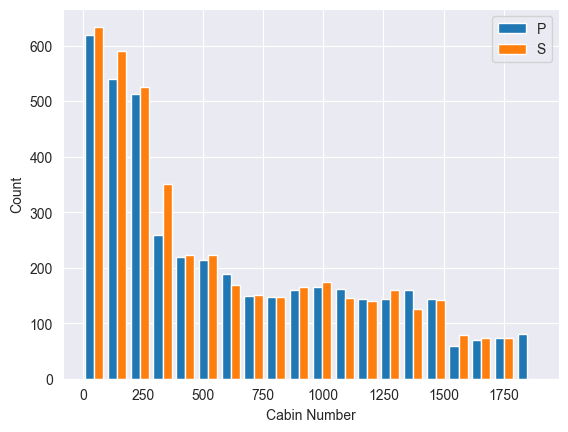

In [1361]:
cabin_side_p = training_set[training_set['cabin_side'] == 'P']
cabin_side_s = training_set[training_set['cabin_side'] == 'S']

plt.hist([cabin_side_p['cabin_num'], cabin_side_s['cabin_num']], bins=20, label=['P', 'S'])
plt.xlabel('Cabin Number')
plt.ylabel('Count')
plt.legend()
plt.show()

Here we can see the distribution of the number of passengers who have a specific cabin_num and a specific cabin_side.
Unfortunately, at this point, this does not provide us with any additional or useful information that we can use for filling in the missing values.

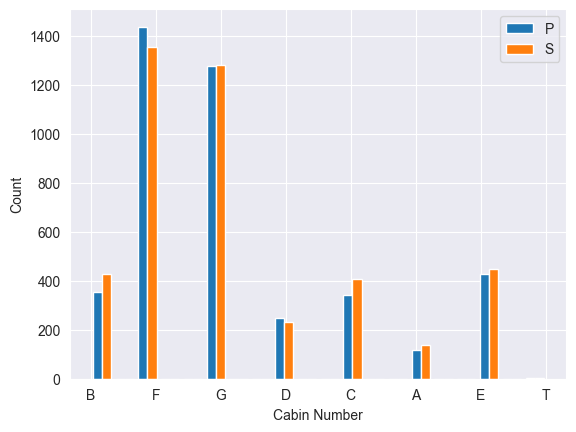

In [1362]:
plt.hist([cabin_side_p['cabin_deck'], cabin_side_s['cabin_deck']], bins=20, label=['P', 'S'])
plt.xlabel('Cabin Number')
plt.ylabel('Count')
plt.legend()
plt.show()

Here we notice that across the different decks, the distribution of cabin_side is similar, meaning that the number of cabins on sides P and S is approximately equal.
This means that when filling in the missing values, we can follow this distribution according to the percentage of passengers on each specific deck and the ratio between the two cabin_side values, P and S, for that deck.

In [1363]:
ALL_DECKS = ['B', 'F', 'G', 'D', 'C', 'A', 'E', 'T']

In [1364]:
def deck_side_ratio(deck, dataset):
    deck = dataset[dataset['cabin_deck'] == f'{deck}']
    deck_total = len(deck)
    
    deck_b_side_p = round(len(deck[deck['cabin_side'] == 'P']) / deck_total * 100, 2)
    deck_b_side_s = round(len(deck[deck['cabin_side'] == 'S']) / deck_total * 100, 2)
    nan_values_percent = round(100 - (deck_b_side_p + deck_b_side_s), 2)
    
    return [deck_b_side_p, deck_b_side_s, nan_values_percent]

In [1365]:
deck_ratio = {}

for deck in ALL_DECKS:
    result = deck_side_ratio(deck, training_set)
    deck_ratio[deck] = result

In [1366]:
deck_ratio_side = pd.DataFrame({
    'deck': ['B', 'F', 'G', 'D', 'C', 'A', 'E', 'T'],
    'ratio_P': [deck_ratio[d][0] for d in ALL_DECKS],
    'ratio_S': [deck_ratio[d][1] for d in ALL_DECKS],
    'missing_values': [deck_ratio[d][2] for d in ALL_DECKS],
})
deck_ratio_side

,deck,ratio_P,ratio_S,missing_values
0,B,44.24,53.38,2.38
1,F,50.60,47.71,1.69
2,G,48.72,48.99,2.29
3,D,50.41,46.75,2.84
4,C,44.17,52.59,3.24
5,A,44.83,53.26,1.91
6,E,47.46,49.45,3.09
7,T,80.00,20.00,0.00


Here we can see the percentage distribution between cabin_side P and S for each individual deck. We can also see the percentage of missing values.

In [1367]:
deck_ratio_ts = {}

for deck in ALL_DECKS:
    result = deck_side_ratio(deck, test_set)
    deck_ratio_ts[deck] = result

In [1368]:
deck_ratio_side_ts = pd.DataFrame({
    'deck': ['B', 'F', 'G', 'D', 'C', 'A', 'E', 'T'],
    'ratio_P': [deck_ratio_ts[d][0] for d in ALL_DECKS],
    'ratio_S': [deck_ratio_ts[d][1] for d in ALL_DECKS],
    'missing_values': [deck_ratio_ts[d][2] for d in ALL_DECKS],
})
deck_ratio_side_ts

,deck,ratio_P,ratio_S,missing_values
0,B,42.97,54.86,2.17
1,F,50.07,47.70,2.23
2,G,48.49,48.81,2.70
3,D,48.61,47.81,3.58
4,C,52.89,44.90,2.21
5,A,49.00,49.00,2.00
6,E,46.80,51.88,1.32
7,T,16.67,83.33,0.00


We can roughly observe the same proportional distribution as in the training set.

In [1369]:
training_set

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0.0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0.0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0.0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0.0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,98.0,P
8689,9278_01,Earth,1,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,1499.0,S
8690,9279_01,Earth,0,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,1500.0,S
8691,9280_01,Europa,0,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,608.0,S


In [1370]:
def deck_side_fill(dataset):
    for deck in deck_ratio_side['deck']:
        mask = (dataset['cabin_deck'] == deck) & (dataset['cabin_side'].isna())
        num_missing = mask.sum()
        
        if num_missing > 0:
            num_p = round(num_missing * deck_ratio_side.loc[deck_ratio_side['deck'] == deck, 'ratio_P'].values[0] / 100)
            num_s = num_missing - num_p
            
            idx_missing = dataset[mask].index
            dataset.loc[idx_missing[:num_p], 'cabin_side'] = 'P'
            dataset.loc[idx_missing[num_p:], 'cabin_side'] = 'S'
    
    return dataset

In [1371]:
training_set = deck_side_fill(training_set)
test_set = deck_side_fill(test_set)

In [1372]:
training_set[training_set['cabin_side'].isna()]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_num,cabin_side


In [1373]:
test_set[test_set['cabin_side'].isna()]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,cabin_deck,cabin_num,cabin_side


With this approach, namely filling based on the deck_side distribution for each specific deck, we completed the missing values.
After these steps, all missing values for the cabin feature — which was split into three separate features (deck, num, and side) — have now been filled.

#### Transform VIP feature from boolean to float - training_set and test_set

---

In [1374]:
# Transform VIP feature from boolean to float
training_set['VIP'] = training_set['VIP'].astype(float)
training_set

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0.0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0.0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0.0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0.0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,98.0,P
8689,9278_01,Earth,1,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,1499.0,S
8690,9279_01,Earth,0,TRAPPIST-1e,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,1500.0,S
8691,9280_01,Europa,0,55 Cancri e,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,608.0,S


In [1375]:
# Transform VIP feature from boolean to float
test_set['VIP'] = test_set['VIP'].astype(float)
test_set

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,cabin_deck,cabin_num,cabin_side
0,0013_01,Earth,1,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3.0,S
1,0018_01,Earth,0,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4.0,S
2,0019_01,Europa,1,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0.0,S
3,0021_01,Europa,0,TRAPPIST-1e,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1.0,S
4,0023_01,Earth,0,TRAPPIST-1e,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,TRAPPIST-1e,34.0,0.0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496.0,S
4273,9269_01,Earth,0,TRAPPIST-1e,42.0,0.0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,G,1044.0,S
4274,9271_01,Mars,1,55 Cancri e,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296.0,P
4275,9273_01,Europa,0,NaN,NaN,0.0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297.0,P


In [1376]:
len(training_set[training_set['VIP'].isna()])

203

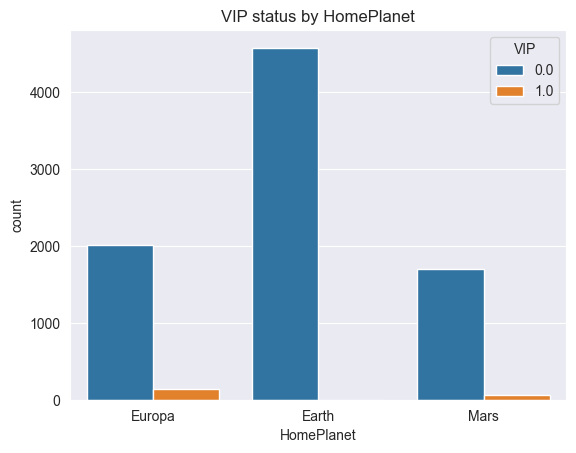

In [1377]:
# Distribution of passengers by planet and VIP status
sns.countplot(x='HomePlanet', hue='VIP', data=training_set)
plt.title('VIP status by HomePlanet')
plt.show()

In [1398]:
# Calculates the percentage of VIP passengers for each planet (Europa, Earth, Mars)
# and returns the results as a DataFrame with the VIP status ratio per planet.
def vip_status_by_planet(dataset):
    europa_vip = len(dataset[(dataset['HomePlanet'] == 'Europa') & (dataset['VIP'] == True)])
    earth_vip = len(dataset[(dataset['HomePlanet'] == 'Earth') & (dataset['VIP'] == True)])
    mars_vip = len(dataset[(dataset['HomePlanet'] == 'Mars') & (dataset['VIP'] == True)])
    
    europa_vip_ratio = round(europa_vip / len(dataset[dataset['HomePlanet'] == 'Europa']) * 100, 2)
    earth_vip_ratio = round(earth_vip / len(dataset[dataset['HomePlanet'] == 'Earth']) * 100, 2)
    mars_vip_ratio = round(mars_vip / len(dataset[dataset['HomePlanet'] == 'Mars']) * 100, 2)
    
    vip_status_by_planet = pd.DataFrame({
    'Europa': [europa_vip_ratio,],
    'Earth': [earth_vip_ratio,],
    'Mars': [mars_vip_ratio,],
    }, index=['VIP Status Ratio'])
    
    return vip_status_by_planet

In [1399]:
result = vip_status_by_planet(training_set)
result

,Europa,Earth,Mars
VIP Status Ratio,6.21,0.11,3.54


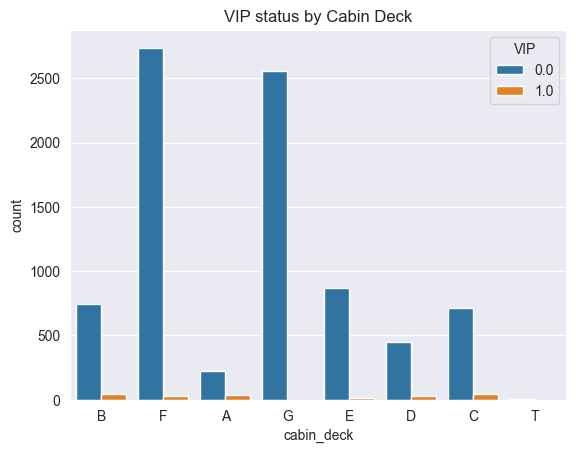

In [1380]:
sns.countplot(x='cabin_deck', hue='VIP', data=training_set)
plt.title('VIP status by Cabin Deck')
plt.show()

In [1400]:
# Calculates the percentage of VIP passengers for each cabin deck (A–T)
# and returns a DataFrame showing the VIP status ratio by deck.
def vip_status_by_deck(dataset):
    vip_counts = {}
    decks = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
    
    for deck in decks:
        vip_count = len(dataset[(dataset['cabin_deck'] == deck) & (dataset['VIP'] == True)])
        total_count = len(dataset[dataset['cabin_deck'] == deck])
        vip_ratio = round(vip_count / total_count * 100, 2) if total_count > 0 else 0
        vip_counts[deck] = vip_ratio

    vip_status_by_deck = pd.DataFrame(vip_counts, index=['VIP Status Ratio'])
    
    return vip_status_by_deck


result = vip_status_by_deck(training_set)
result

,A,B,C,D,E,F,G,T
VIP Status Ratio,13.41,5.89,5.57,6.3,1.66,1.09,0.11,0.0


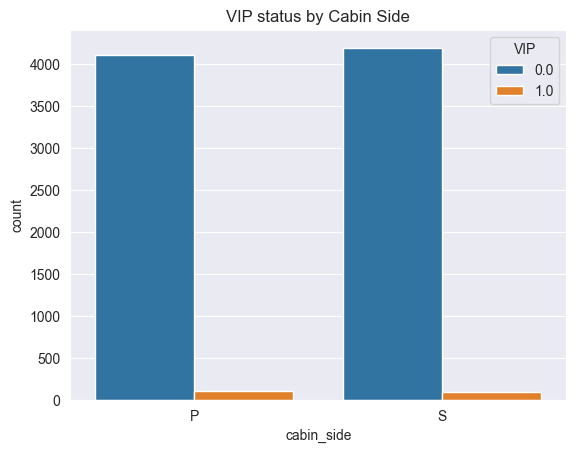

In [1382]:
sns.countplot(x='cabin_side', hue='VIP', data=training_set)
plt.title('VIP status by Cabin Side')
plt.show()

In [1401]:
# Calculates the percentage of VIP passengers for each cabin side (Port and Starboard)
# and returns a DataFrame showing the VIP status ratio by side.
def vip_status_by_side(dataset):
    sides = {'Port [P]': 'P', 'Starboard [S]': 'S'}
    vip_ratios = {}

    for label, side in sides.items():
        vip_count = len(dataset[(dataset['cabin_side'] == side) & (dataset['VIP'] == True)])
        total_count = len(dataset[dataset['cabin_side'] == side])
        vip_ratio = round(vip_count / total_count * 100, 2) if total_count > 0 else 0
        vip_ratios[label] = vip_ratio

    vip_status_by_side = pd.DataFrame(vip_ratios, index=['VIP Status Ratio'])
    return vip_status_by_side


result = vip_status_by_side(training_set)
result

,Port [P],Starboard [S]
VIP Status Ratio,2.53,2.19


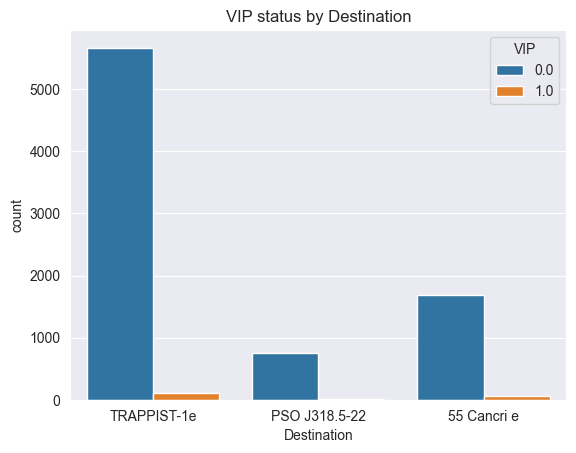

In [1384]:
sns.countplot(x='Destination', hue='VIP', data=training_set)
plt.title('VIP status by Destination')
plt.show()

In [1402]:
# Calculates the percentage of VIP passengers for each destination
# and returns a DataFrame showing the VIP status ratio by destination.
def vip_status_by_destination(dataset):
    destinations = ['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']
    vip_ratios = {}

    for dest in destinations:
        vip_count = len(dataset[(dataset['Destination'] == dest) & (dataset['VIP'] == True)])
        total_count = len(dataset[dataset['Destination'] == dest])
        vip_ratio = round(vip_count / total_count * 100, 2) if total_count > 0 else 0
        vip_ratios[dest] = vip_ratio

    vip_status_by_destination = pd.DataFrame(vip_ratios, index=['VIP Status Ratio'])
    return vip_status_by_destination


result = vip_status_by_destination(training_set)
result

,TRAPPIST-1e,PSO J318.5-22,55 Cancri e
VIP Status Ratio,2.01,2.39,3.61


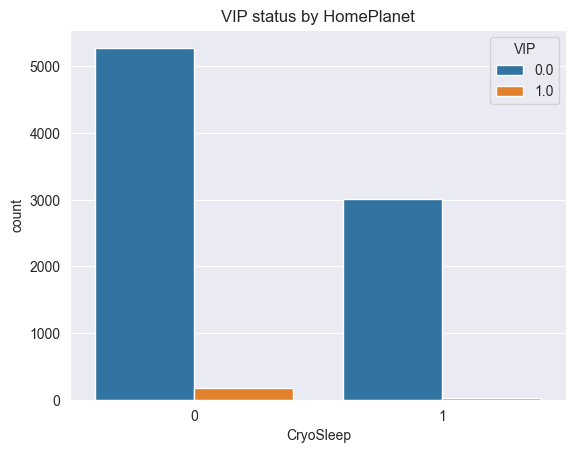

In [1386]:
sns.countplot(x='CryoSleep', hue='VIP', data=training_set)
plt.title('VIP status by HomePlanet')
plt.show()

In [1403]:
# Calculates the percentage of VIP passengers based on CryoSleep status (True or False)
# and returns a DataFrame showing the VIP status ratio by CryoSleep condition.
def vip_status_by_cryo(dataset):
    cryo_states = {True: 'CryoSleep - True', False: 'CryoSleep - False'}
    vip_ratios = {}

    for state, label in cryo_states.items():
        vip_count = len(dataset[(dataset['CryoSleep'] == state) & (dataset['VIP'] == True)])
        total_count = len(dataset[dataset['CryoSleep'] == state])
        vip_ratio = round(vip_count / total_count * 100, 2) if total_count > 0 else 0
        vip_ratios[label] = vip_ratio

    vip_status_by_cryo = pd.DataFrame(vip_ratios, index=['VIP Status Ratio'])
    return vip_status_by_cryo


result = vip_status_by_cryo(training_set)
result

,CryoSleep - True,CryoSleep - False
VIP Status Ratio,0.8,3.22


In [1388]:
planet_ratio = vip_status_by_planet(training_set).iloc[0].to_dict()
deck_ratio = vip_status_by_deck(training_set).iloc[0].to_dict()
side_ratio = vip_status_by_side(training_set).iloc[0].to_dict()
dest_ratio = vip_status_by_destination(training_set).iloc[0].to_dict()
cryo_ratio = vip_status_by_cryo(training_set).iloc[0].to_dict()

In [1389]:
# Estimates the probability of a passenger being VIP based on multiple categorical features.
# Combines VIP ratio values from HomePlanet, cabin deck, cabin side, destination, and CryoSleep.
# Returns True or False using a random draw weighted by the average VIP probability.
def estimate_vip(row):
    ratios = []
    if row['HomePlanet'] in planet_ratio:
        ratios.append(planet_ratio[row['HomePlanet']])
    if row['cabin_deck'] in deck_ratio:
        ratios.append(deck_ratio[row['cabin_deck']])
    if row['cabin_side'] in side_ratio:
        ratios.append(side_ratio[row['cabin_side']])
    if row['Destination'] in dest_ratio:
        ratios.append(dest_ratio[row['Destination']])
    if row['CryoSleep'] in cryo_ratio:
        ratios.append(cryo_ratio[row['CryoSleep']])
    if not ratios:
        return np.nan
    avg_ratio = np.mean(ratios)
    
    return np.random.rand() < (avg_ratio / 100)

In [1393]:
training_set['VIP'] = training_set['VIP'].astype(object)
training_set.loc[training_set['VIP'].isna(), 'VIP'] = training_set[training_set['VIP'].isna()].apply(estimate_vip, axis=1)
training_set

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0.0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0.0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0.0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0.0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,98.0,P
8689,9278_01,Earth,1,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,1499.0,S
8690,9279_01,Earth,0,TRAPPIST-1e,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,1500.0,S
8691,9280_01,Europa,0,55 Cancri e,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,608.0,S


In [1394]:
training_set[training_set['VIP'].isna()]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_num,cabin_side


In [1405]:
result1 = vip_status_by_planet(test_set)
result2 = vip_status_by_deck(test_set)
result3 = vip_status_by_side(test_set)
result4 = vip_status_by_destination(test_set)
result5 = vip_status_by_cryo(test_set)

In [1406]:
result1

,Europa,Earth,Mars
VIP Status Ratio,4.5,0.0,2.98


In [1407]:
result2

,A,B,C,D,E,F,G,T
VIP Status Ratio,10.0,4.59,3.86,3.98,2.43,0.81,0.0,0.0


In [1408]:
result3

,Port [P],Starboard [S]
VIP Status Ratio,1.92,1.54


In [1409]:
result4

,TRAPPIST-1e,PSO J318.5-22,55 Cancri e
VIP Status Ratio,1.66,1.03,2.38


In [1410]:
result5

,CryoSleep - True,CryoSleep - False
VIP Status Ratio,0.51,2.45


In [1411]:
test_set['VIP'] = test_set['VIP'].astype(object)
test_set.loc[test_set['VIP'].isna(), 'VIP'] = test_set[test_set['VIP'].isna()].apply(estimate_vip, axis=1)
test_set

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,cabin_deck,cabin_num,cabin_side
0,0013_01,Earth,1,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3.0,S
1,0018_01,Earth,0,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4.0,S
2,0019_01,Europa,1,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0.0,S
3,0021_01,Europa,0,TRAPPIST-1e,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1.0,S
4,0023_01,Earth,0,TRAPPIST-1e,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,TRAPPIST-1e,34.0,0.0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496.0,S
4273,9269_01,Earth,0,TRAPPIST-1e,42.0,0.0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,G,1044.0,S
4274,9271_01,Mars,1,55 Cancri e,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296.0,P
4275,9273_01,Europa,0,NaN,NaN,0.0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297.0,P


In [1412]:
test_set[test_set['VIP'].isna()]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,cabin_deck,cabin_num,cabin_side


Final Conclusion

In this analysis, we examined the distribution and likelihood of passengers being VIPs based on several categorical factors: HomePlanet, Cabin Deck, Cabin Side, Destination, and CryoSleep status.

We created dedicated functions to calculate the VIP ratio within each category, allowing us to understand how VIP status varies across different groups. These functions provided clear and structured statistical insights into the dataset.

Afterward, we combined all ratio information to build the estimate_vip() function — a probabilistic model that estimates missing VIP values by averaging the corresponding category ratios. This approach uses a data-driven logic, where each passenger’s characteristics influence their likelihood of being VIP.

As a result, we achieved a consistent, interpretable, and automated method for imputing missing VIP values while preserving realistic proportions based on the actual data distribution.